In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Cardiotocographic.csv')

#### 1.	Data Cleaning and Preparation:

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [13]:
#checking for null values
df.isnull().sum()/len(df)*100

LB          0.987770
AC          0.940734
FM          0.000000
UC          0.000000
DL          0.000000
DS          0.987770
DP          0.987770
ASTV        0.000000
MSTV        0.000000
ALTV        0.000000
MLTV        0.987770
Width       0.987770
Tendency    0.987770
NSP         0.987770
dtype: float64

In [15]:
#droppping missing values.
df= df.dropna()

In [17]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [19]:
df[df.duplicated( keep = False)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1113,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1457,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [21]:
df.drop_duplicates()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [23]:
coluumns = df.columns

#### 2.	Statistical Summary:
* range of features like DS, DL, DP, UC,FM AC is very less. infact the q1 , q2 and q3 quartiles lie together.

In [26]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [28]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_stand = sc.fit_transform(df)

In [30]:
df_stand = pd.DataFrame(df_stand, columns= df.columns)
df_stand

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,-1.184258,-0.740798,-0.146835,-1.310156,-0.565300,-0.017731,-0.20862,1.379967,-0.734092,1.534346,-0.757287,-0.149791,1.059005,1.079177
1,-0.119246,0.735064,-0.146835,0.594840,0.387636,-0.017731,-0.20862,-1.591918,0.630065,-0.486611,0.272180,1.387896,-0.490142,-0.472495
2,-0.030495,0.027778,-0.146835,1.169977,0.427209,-0.017731,-0.20862,-1.644988,0.630065,-0.486611,0.658230,1.387896,-0.490142,-0.472495
3,0.058256,-0.148375,-0.146835,1.001632,0.199733,-0.017731,-0.20862,-1.644988,0.885845,-0.486611,1.893590,1.085018,1.059120,-0.472495
4,-0.123840,0.766312,-0.146835,1.121506,-0.565300,-0.017731,-0.20862,-1.644988,0.885845,-0.486611,1.494672,1.085018,1.059120,-0.472495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.590762,-0.740798,14.019859,0.907231,-0.565300,-0.017731,-0.20862,1.698383,-0.989871,0.688364,-0.139607,-0.708949,-0.490142,1.079177
2101,0.590762,-0.561603,-0.146835,0.773903,-0.565300,-0.017731,-0.20862,1.645314,-0.819351,0.547367,-0.152475,-0.103194,1.059120,1.079177
2102,0.590762,-0.513993,-0.146835,0.739115,-0.565300,-0.017731,-0.20862,1.698383,-0.819351,0.453369,-0.281159,-0.079896,1.059120,1.064380
2103,0.590762,-0.583743,-0.146835,0.514333,-0.565300,-0.017731,-0.20862,1.645314,-0.819351,0.782362,-0.165344,-0.103194,1.059120,1.079177


#### 3.	Data Visualization:

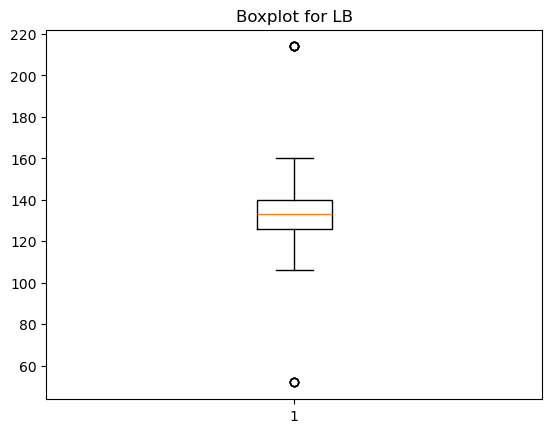

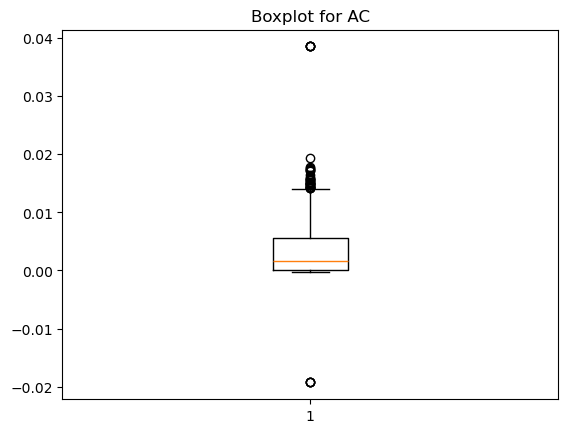

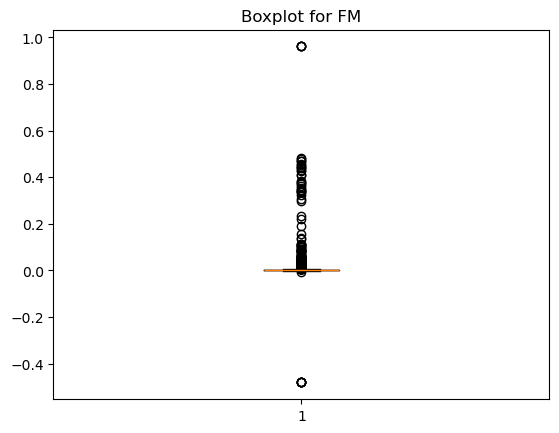

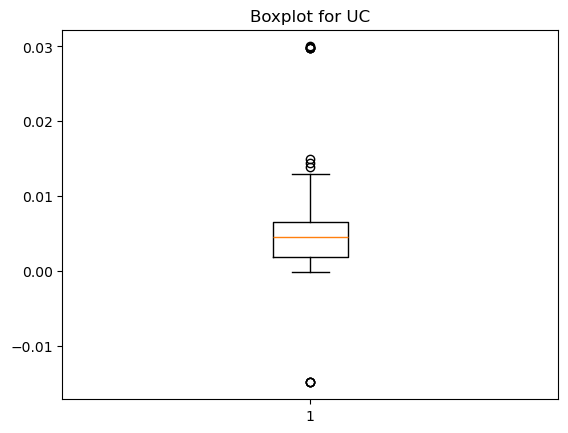

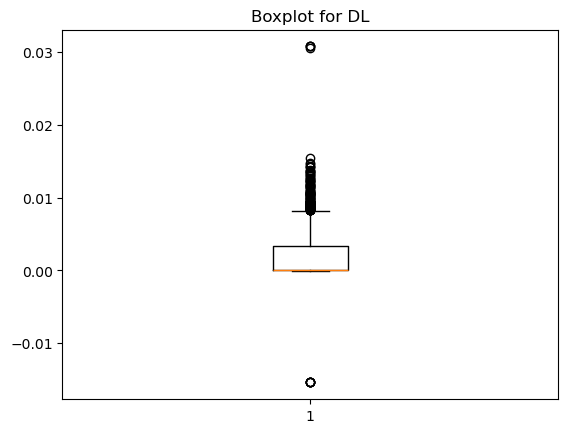

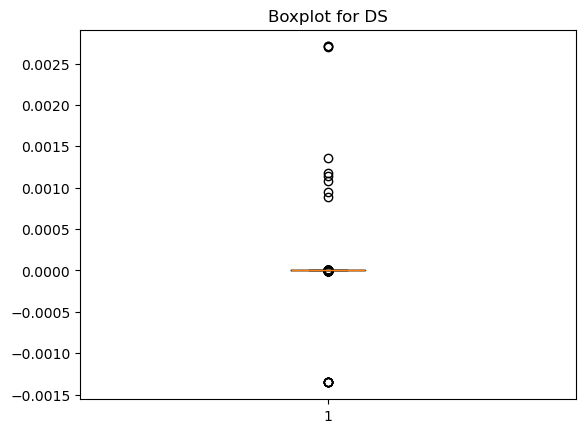

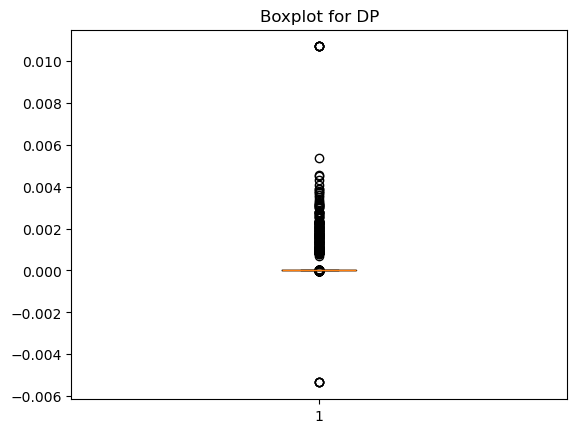

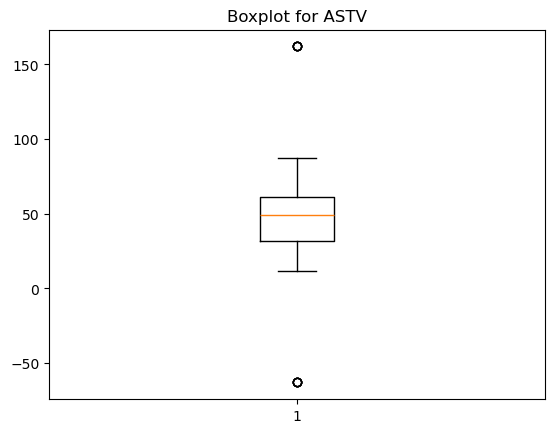

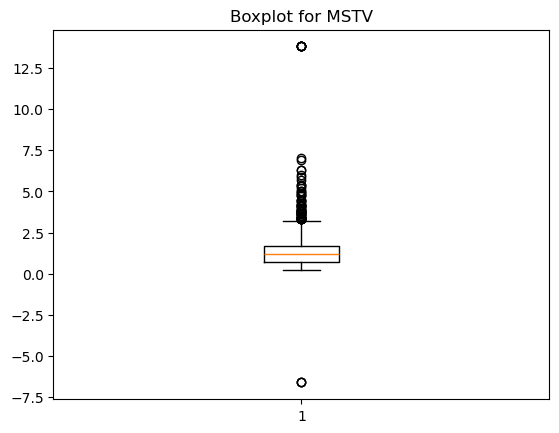

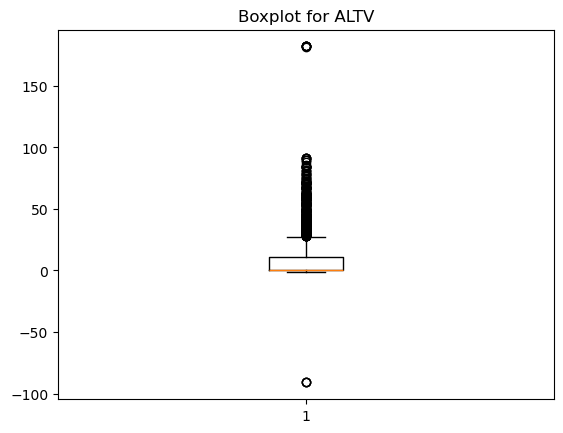

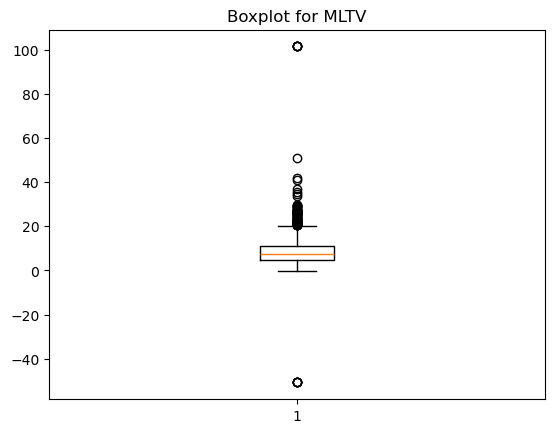

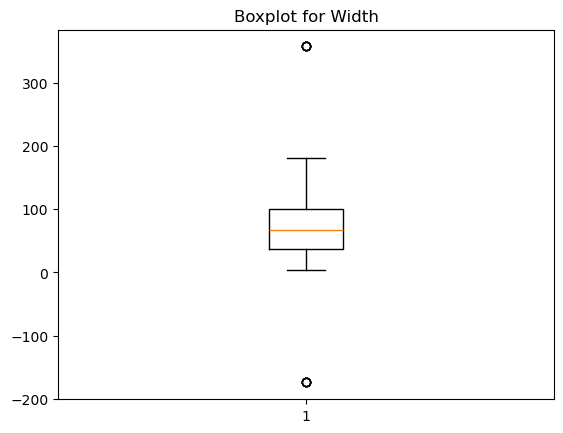

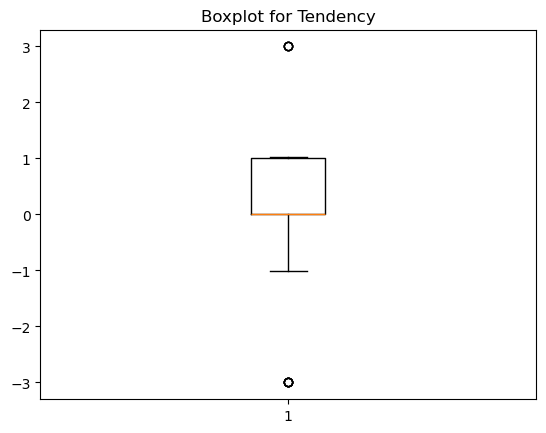

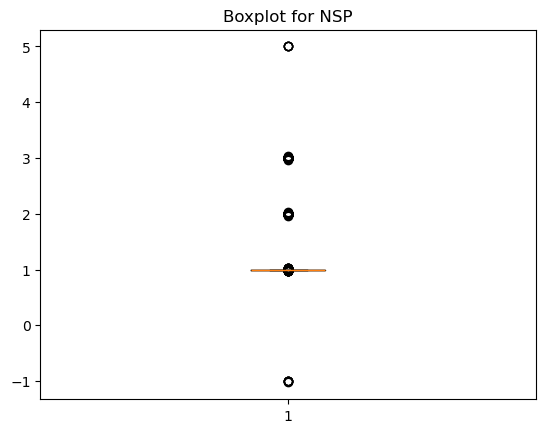

In [33]:
for word in coluumns:
    plt.boxplot(df[word])
    plt.title(f"Boxplot for {word}")
    plt.show()

* there is no ay categorical column to create a bar chart.

#### 4.	Pattern Recognition and Insights:

<Axes: >

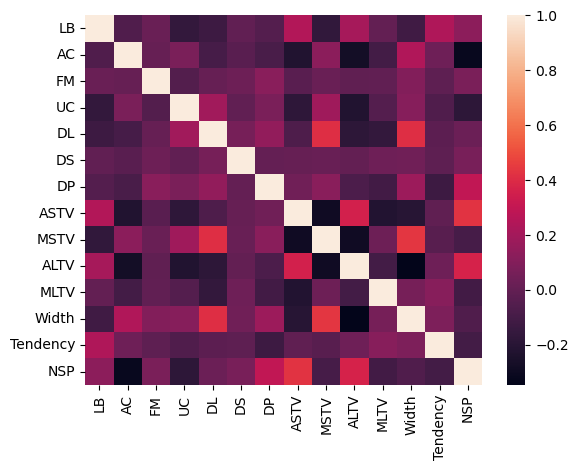

In [92]:
sns.heatmap(df_stand.corr())

In [95]:
df_stand.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438,-0.047724,0.242625,-0.170473,0.210728,-0.003457,-0.118425,0.236864,0.131843
AC,-0.063830,1.000000,0.010152,0.070135,-0.095491,-0.033623,-0.084590,-0.230487,0.126752,-0.273890,-0.106529,0.238436,0.032481,-0.316941
FM,0.018777,0.010152,1.000000,-0.052979,0.009830,0.029901,0.121284,-0.032783,0.017481,-0.012276,-0.006237,0.097213,-0.018339,0.074054
UC,-0.166570,0.070135,-0.052979,1.000000,0.191864,-0.006937,0.070658,-0.181133,0.190011,-0.227817,-0.049460,0.107397,-0.066610,-0.185411
DL,-0.126959,-0.095491,0.009830,0.191864,1.000000,0.058625,0.145425,-0.070792,0.410155,-0.186571,-0.165750,0.410031,-0.023569,0.025427
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000,0.004285,0.008452,0.016163,-0.004398,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.084590,0.121284,0.070658,0.145425,0.004285,1.000000,0.038238,0.119892,-0.077758,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.242625,-0.230487,-0.032783,-0.181133,-0.070792,0.008452,0.038238,1.000000,-0.293388,0.357668,-0.220427,-0.207599,-0.010927,0.422652
MSTV,-0.170473,0.126752,0.017481,0.190011,0.410155,0.016163,0.119892,-0.293388,1.000000,-0.291362,0.028934,0.435393,-0.036857,-0.095139
ALTV,0.210728,-0.273890,-0.012276,-0.227817,-0.186571,-0.004398,-0.077758,0.357668,-0.291362,1.000000,-0.107712,-0.346460,0.036771,0.365846


<Axes: >

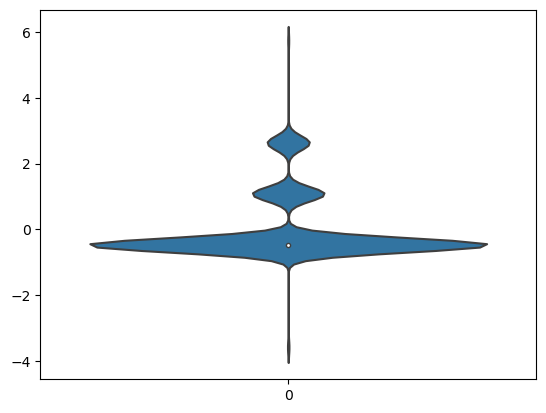

In [94]:
sns.violinplot(df_stand['NSP']) 

* no strong correlation can be observed in any columns. 

#### 5.	Conclusion:
##### Strong Positive Correlations with NSP:
* ASTV (0.422652) and ALTV (0.365846): Higher values of ASTV and ALTV are associated with higher NSP, indicating their importance in predicting NSP.
* Significant Negative Correlations with NSP:
* AC (-0.316941): Higher AC values are associated with lower NSP, suggesting the need for careful monitoring when AC is high.
* Positive Correlations Among Variabilities:
* DL and MSTV (0.410155) and Width and MSTV (0.435393): Higher decelerations and width are associated with greater mean short-term variability.
* Negative Correlations with ASTV:
* ASTV and MSTV (-0.293388) and ASTV and UC (-0.181133): Higher ASTV is associated with lower MSTV and UC, indicating a complex relationship between these variables.
* Baseline Heart Rate (LB) Correlations:
* LB and ASTV (0.242625) and ALTV (0.210728): Higher baseline heart rates are associated with increased variabilities, showing their influence on heart rate metrics.
##### Impact on Decision-Making and Further Analyses
* Predict NSP using ASTV and ALTV: Leverage the strong positive correlations to monitor fetal well-being.
* Intervene for High AC: Address high AC values to mitigate risks associated with lower NSP.
* Enhance Monitoring Protocols: Use correlations involving MSTV, DL, and Width to design better fetal heart rate variability monitoring strategies.
* Conduct Regression Analysis: Quantify the impact of key variables on NSP for precise predictive models.
* Explore Machine Learning Models: Build robust models for predicting NSP and other outcomes using identified key variables.